In [30]:
import pandas as pd

In [31]:
df = pd.read_csv("/content/user_behavior_data.csv")

In [32]:
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,NaN,42.0,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,NaN,22.0,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,NaN,59.0,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457.0,50.0,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224.0,44.0,Male,1


In [33]:
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,70
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),140
Age,35
Gender,0


In [34]:
percent_missing = df.isnull().sum() / len(df) * 100

In [35]:
percent_missing

,0
User ID,0.0
Device Model,0.0
Operating System,10.0
App Usage Time (min/day),0.0
Screen On Time (hours/day),0.0
Battery Drain (mAh/day),0.0
Number of Apps Installed,0.0
Data Usage (MB/day),20.0
Age,5.0
Gender,0.0


<Axes: >

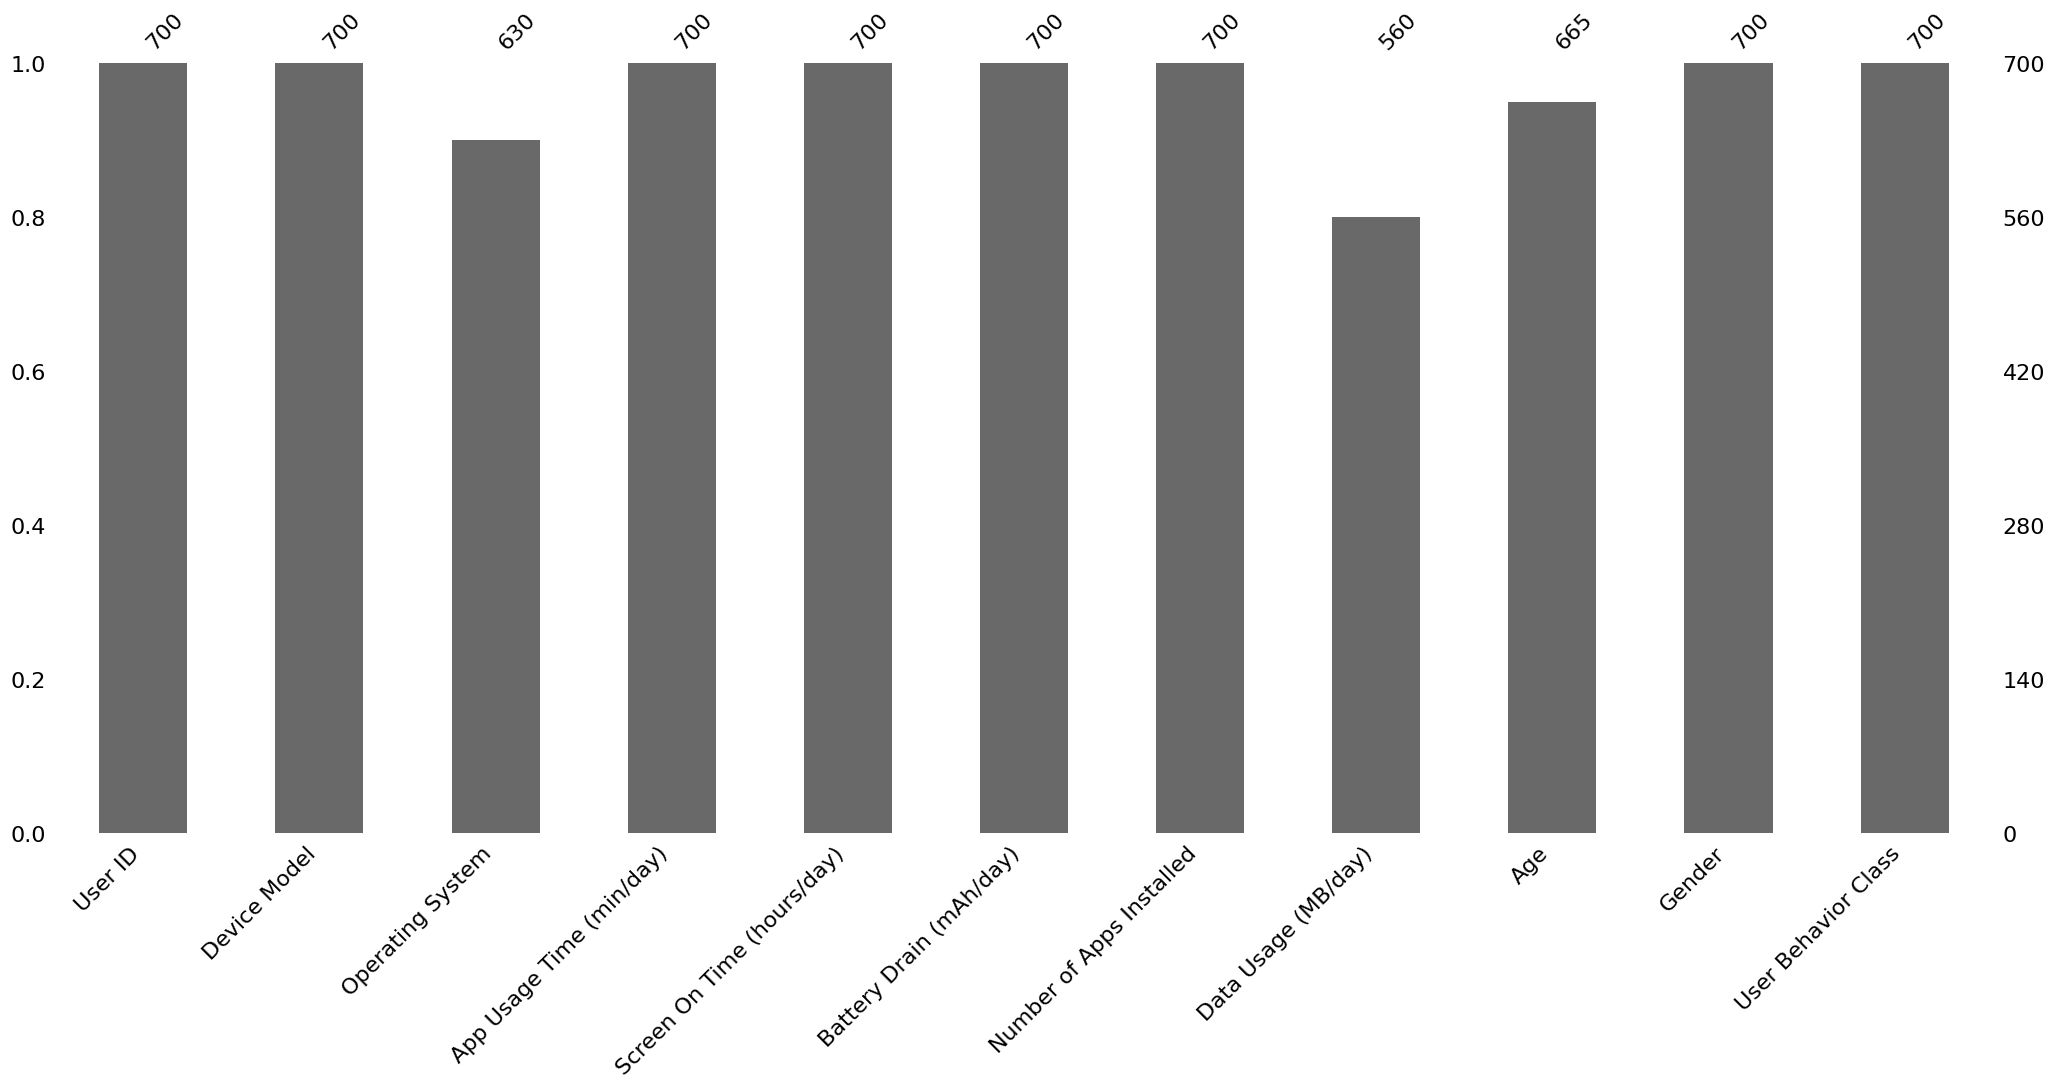

In [36]:
import missingno as msno
msno.bar(df)

<Axes: >

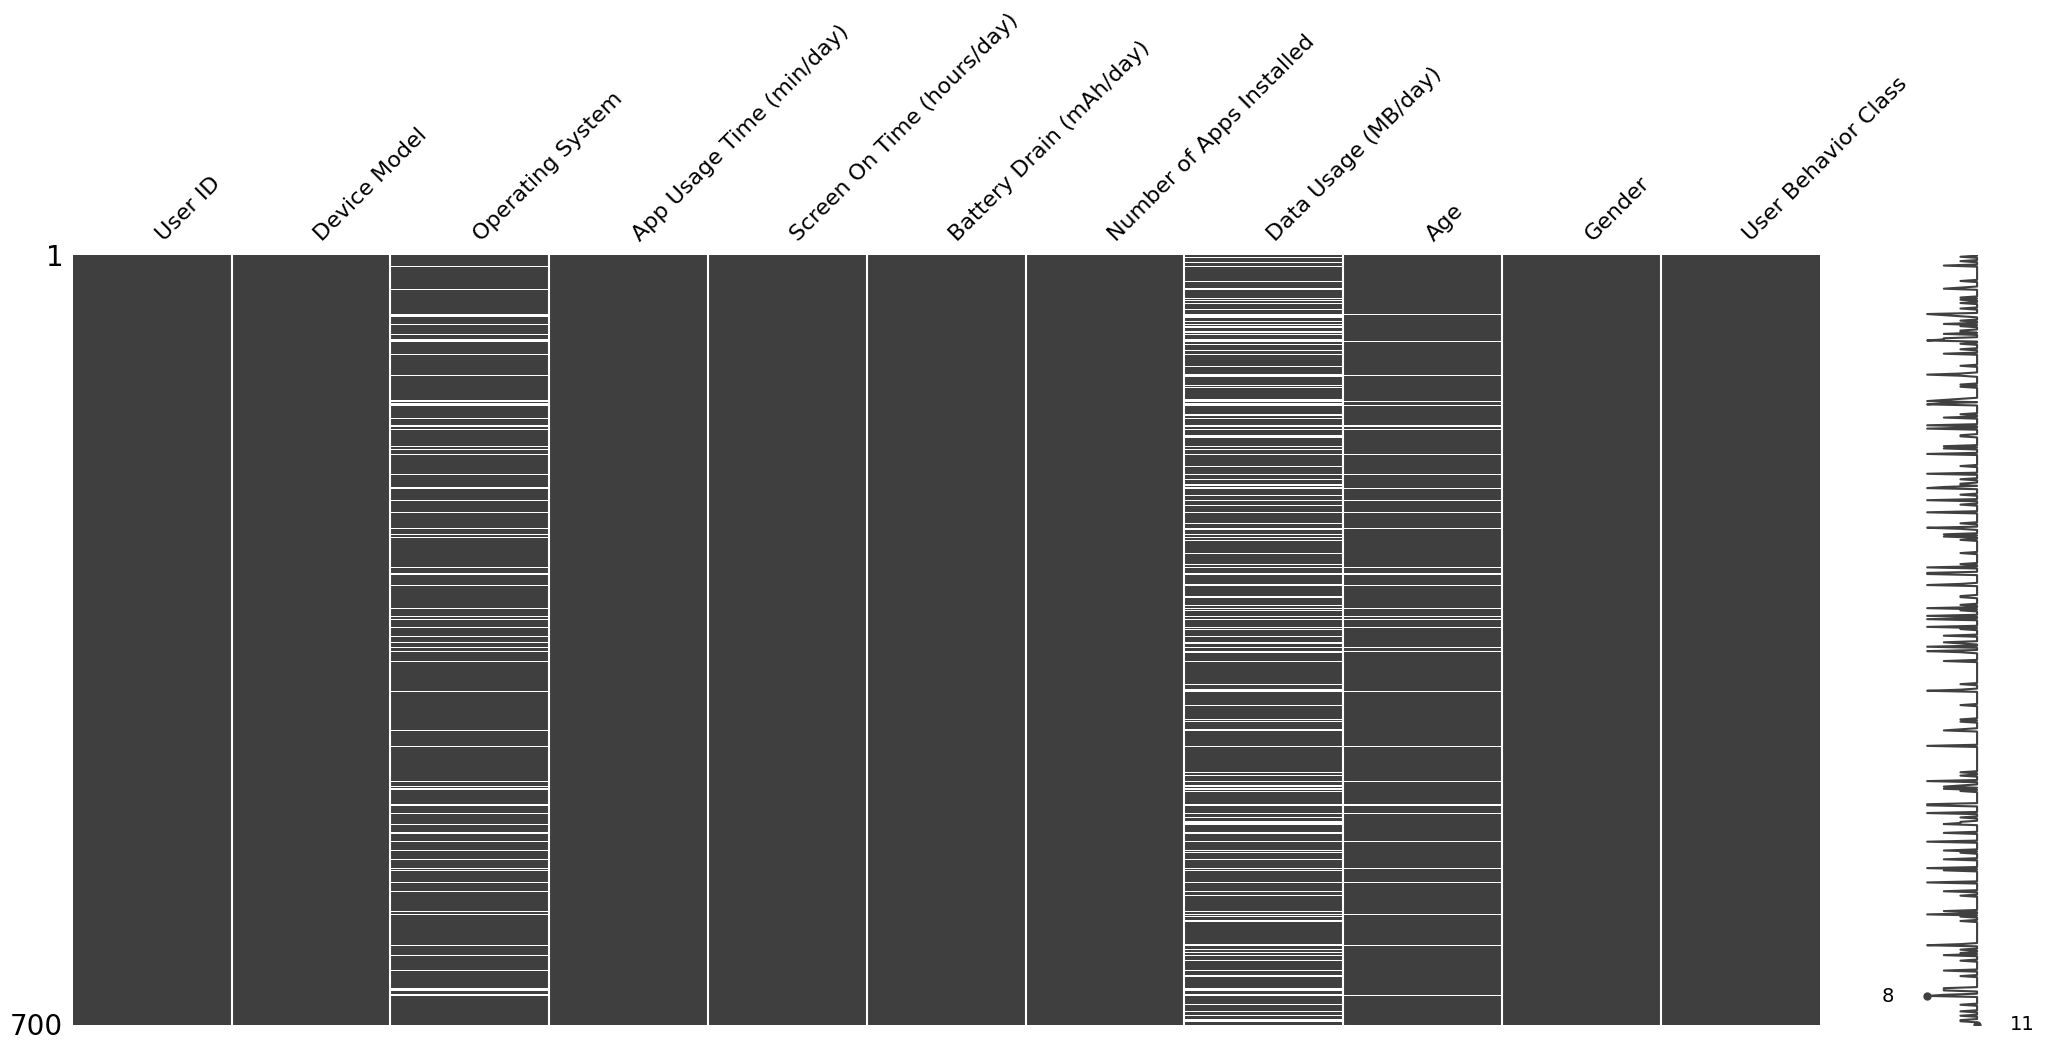

In [37]:
msno.matrix(df)

<Axes: >

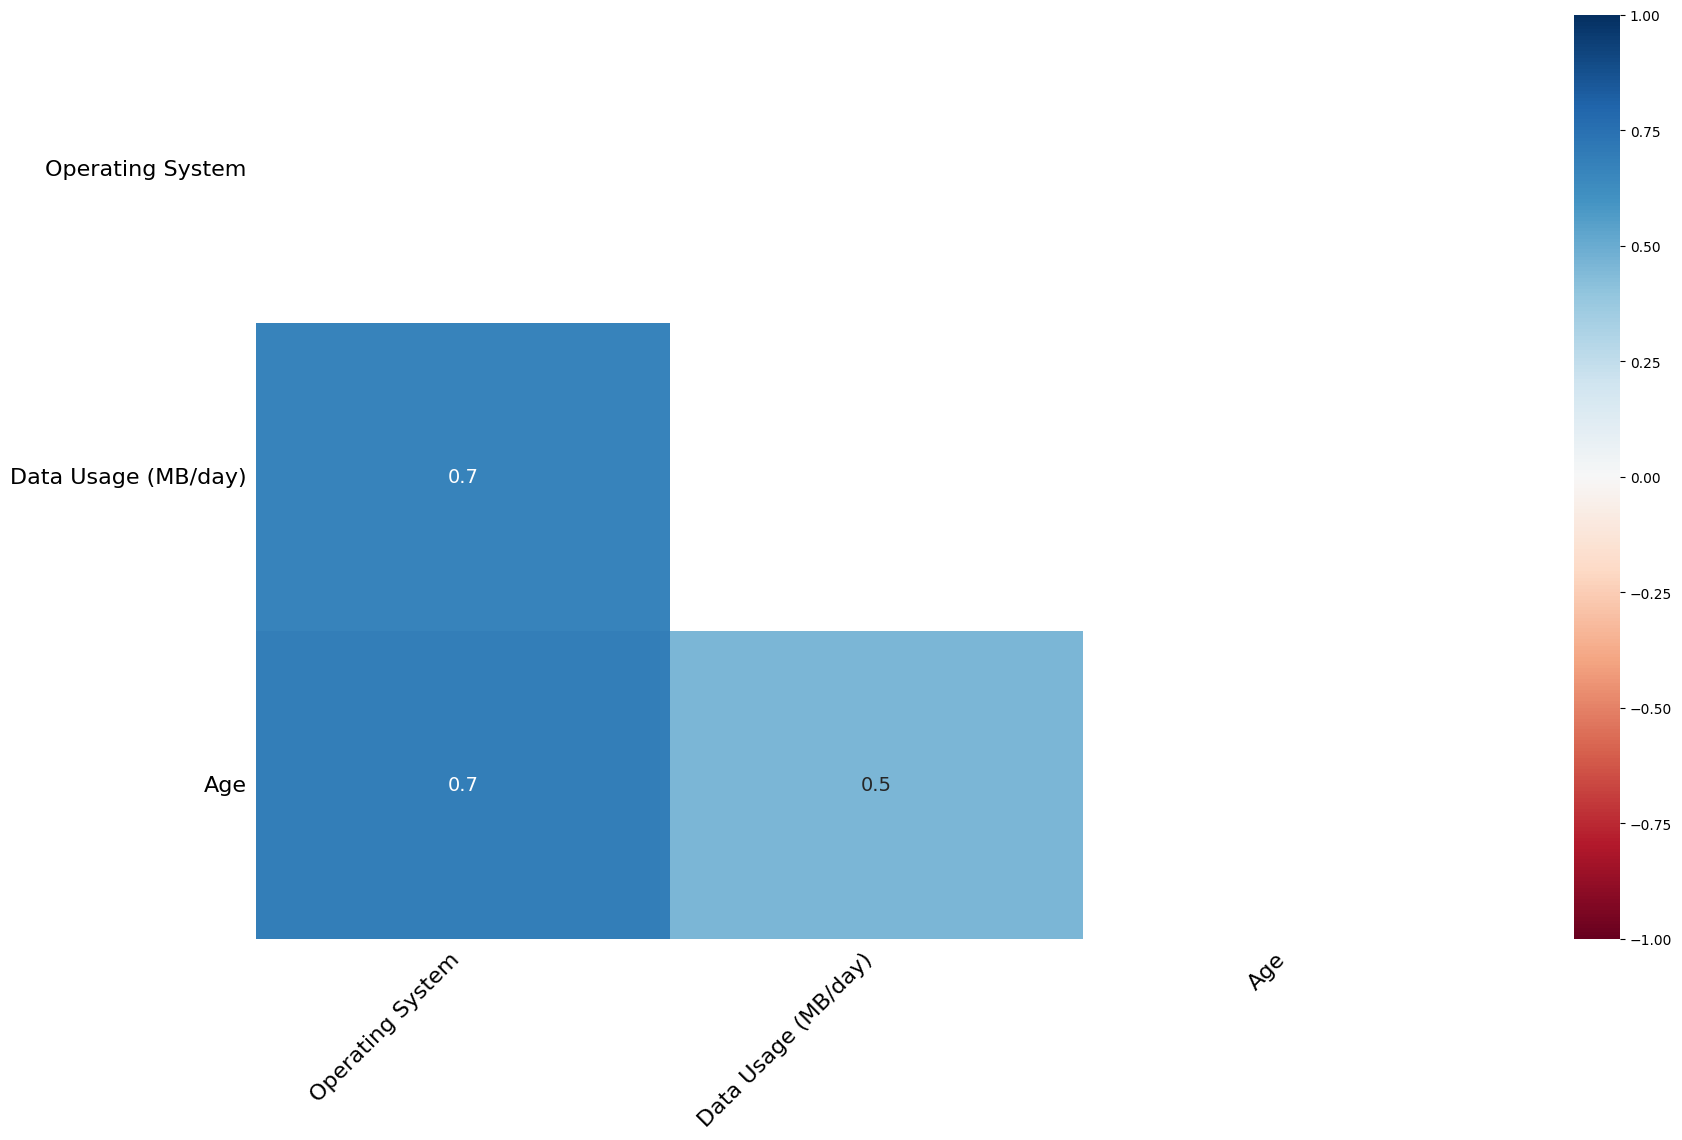

In [38]:
msno.heatmap(df)

<Axes: >

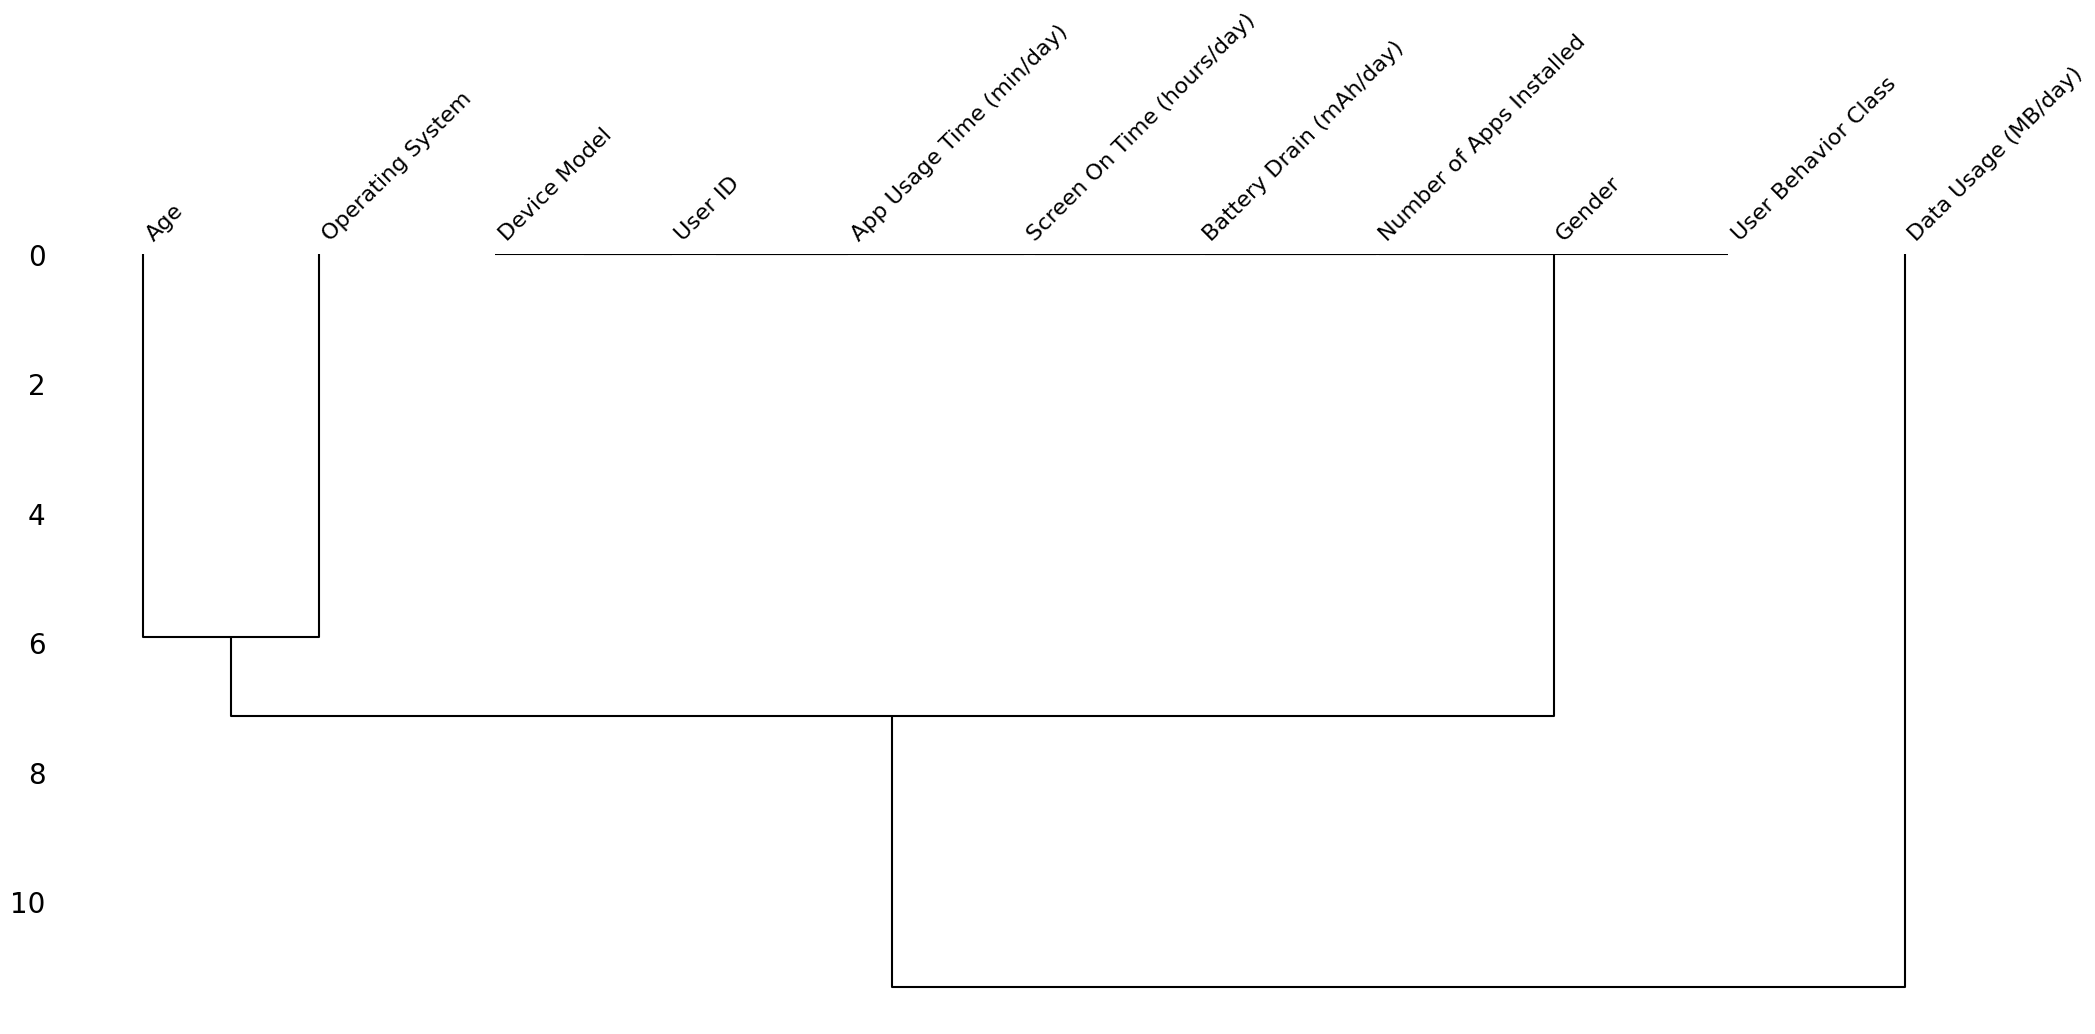

In [39]:
msno.dendrogram(df)

In [40]:
data_used = df[['Data Usage (MB/day)','Operating System']]


In [41]:
data_used

,Data Usage (MB/day),Operating System
0,1122.0,Android
1,944.0,Android
2,NaN,Android
3,871.0,Android
4,988.0,iOS
...,...,...
695,NaN,iOS
696,NaN,Android
697,457.0,Android
698,224.0,Android


In [42]:
from sklearn.impute import SimpleImputer, KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

In [43]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
copy_df = df.copy()
encoder = LabelEncoder()
copy_df['Operating System'] = encoder.fit_transform(df['Operating System'])
copy_df['Device Model'] = encoder.fit_transform(df['Device Model'])
copy_df['Gender'] = encoder.fit_transform(df['Gender'])

In [50]:
copy_df
copy_df.drop('User ID', axis=1,inplace=True)

In [51]:
copy_df

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0,0,393,6.4,1872,67,1122.0,40.0,1,4
1,1,0,268,4.7,1331,42,944.0,47.0,0,3
2,3,0,154,4.0,761,32,NaN,42.0,1,2
3,0,0,239,4.8,1676,56,871.0,20.0,1,3
4,4,1,187,4.3,1367,58,988.0,31.0,0,3
...,...,...,...,...,...,...,...,...,...,...
695,4,1,92,3.9,1082,26,NaN,22.0,1,2
696,3,0,316,6.8,1965,68,NaN,59.0,1,4
697,0,0,99,3.1,942,22,457.0,50.0,0,2
698,2,0,62,1.7,431,13,224.0,44.0,1,1


In [52]:
from sklearn.impute import SimpleImputer, KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

In [54]:
imputed_data = knn_imputer.fit_transform(copy_df[['Age']])

In [55]:
imputed_data

array([[40.        ],
       [47.        ],
       [42.        ],
       [20.        ],
       [31.        ],
       [31.        ],
       [21.        ],
       [31.        ],
       [42.        ],
       [42.        ],
       [34.        ],
       [24.        ],
       [57.        ],
       [43.        ],
       [49.        ],
       [39.        ],
       [47.        ],
       [44.        ],
       [26.        ],
       [29.        ],
       [45.        ],
       [43.        ],
       [23.        ],
       [37.        ],
       [58.        ],
       [52.        ],
       [29.        ],
       [33.        ],
       [55.        ],
       [19.        ],
       [37.        ],
       [25.        ],
       [21.        ],
       [58.        ],
       [38.        ],
       [20.        ],
       [26.        ],
       [24.        ],
       [40.        ],
       [23.        ],
       [56.        ],
       [33.        ],
       [43.        ],
       [18.        ],
       [56.        ],
       [39

In [56]:
copy_df['Age'] = imputed_data

In [58]:
copy_df

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0,0,393,6.4,1872,67,1122.0,40.0,1,4
1,1,0,268,4.7,1331,42,944.0,47.0,0,3
2,3,0,154,4.0,761,32,NaN,42.0,1,2
3,0,0,239,4.8,1676,56,871.0,20.0,1,3
4,4,1,187,4.3,1367,58,988.0,31.0,0,3
...,...,...,...,...,...,...,...,...,...,...
695,4,1,92,3.9,1082,26,NaN,22.0,1,2
696,3,0,316,6.8,1965,68,NaN,59.0,1,4
697,0,0,99,3.1,942,22,457.0,50.0,0,2
698,2,0,62,1.7,431,13,224.0,44.0,1,1


In [60]:
copy_df.isnull().sum()

,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),140
Age,0
Gender,0
User Behavior Class,0


In [61]:
imputed_data = knn_imputer.fit_transform(copy_df[['Data Usage (MB/day)']])

In [62]:
copy_df['Data Usage (MB/day)'] = imputed_data

In [63]:
copy_df.isnull().sum()

,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0
User Behavior Class,0


In [64]:
copy_df

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0,0,393,6.4,1872,67,1122.000000,40.0,1,4
1,1,0,268,4.7,1331,42,944.000000,47.0,0,3
2,3,0,154,4.0,761,32,942.332143,42.0,1,2
3,0,0,239,4.8,1676,56,871.000000,20.0,1,3
4,4,1,187,4.3,1367,58,988.000000,31.0,0,3
...,...,...,...,...,...,...,...,...,...,...
695,4,1,92,3.9,1082,26,942.332143,22.0,1,2
696,3,0,316,6.8,1965,68,942.332143,59.0,1,4
697,0,0,99,3.1,942,22,457.000000,50.0,0,2
698,2,0,62,1.7,431,13,224.000000,44.0,1,1


NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [67]:
y = copy_df['User Behavior Class']
x = copy_df.drop(['User Behavior Class'], axis=1)
from sklearn.model_selection import train_test_split
#80:20
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=2)

In [81]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
y_pred = model.predict(X_test)

In [83]:
model.coef_

array([[ 9.53720402e-03,  1.35783238e-03, -9.24802363e-02,
        -6.81680733e-04,  1.91161672e-03, -7.53605989e-03,
         5.57761071e-03,  1.83658252e-01,  2.88309780e-03],
       [ 5.49298496e-03,  6.25443094e-04, -2.19351603e-02,
         1.49450898e-03,  3.85095575e-05,  1.70592588e-02,
         2.80657876e-03,  7.98137537e-02,  1.99140037e-03],
       [-2.90087834e-03,  5.92361645e-04,  2.20710426e-02,
        -1.03202172e-04,  5.65255246e-04,  1.43866186e-02,
        -2.64929954e-03, -3.46336788e-02, -1.74658387e-03],
       [-2.97148164e-03, -1.88262504e-03,  3.61889482e-02,
        -4.88676028e-03,  1.15851108e-04,  3.24624290e-03,
        -3.82270394e-03, -7.73887227e-02, -1.28068824e-03],
       [-9.15782901e-03, -6.93012077e-04,  5.61554058e-02,
         4.17713421e-03, -2.63123263e-03, -2.71560604e-02,
        -1.91218599e-03, -1.51449604e-01, -1.84722606e-03]])

In [85]:
from sklearn.metrics import f1_score,classification_report,accuracy_score

f1_score(y_test,y_pred,average='micro')

0.6071428571428571

In [87]:
f1_score(y_test,y_pred,average='macro')

0.608171281295295

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.62      0.77        29
           2       0.65      0.75      0.70        32
           3       0.47      0.64      0.55        28
           4       0.47      0.28      0.35        32
           5       0.57      0.84      0.68        19

    accuracy                           0.61       140
   macro avg       0.63      0.63      0.61       140
weighted avg       0.64      0.61      0.60       140



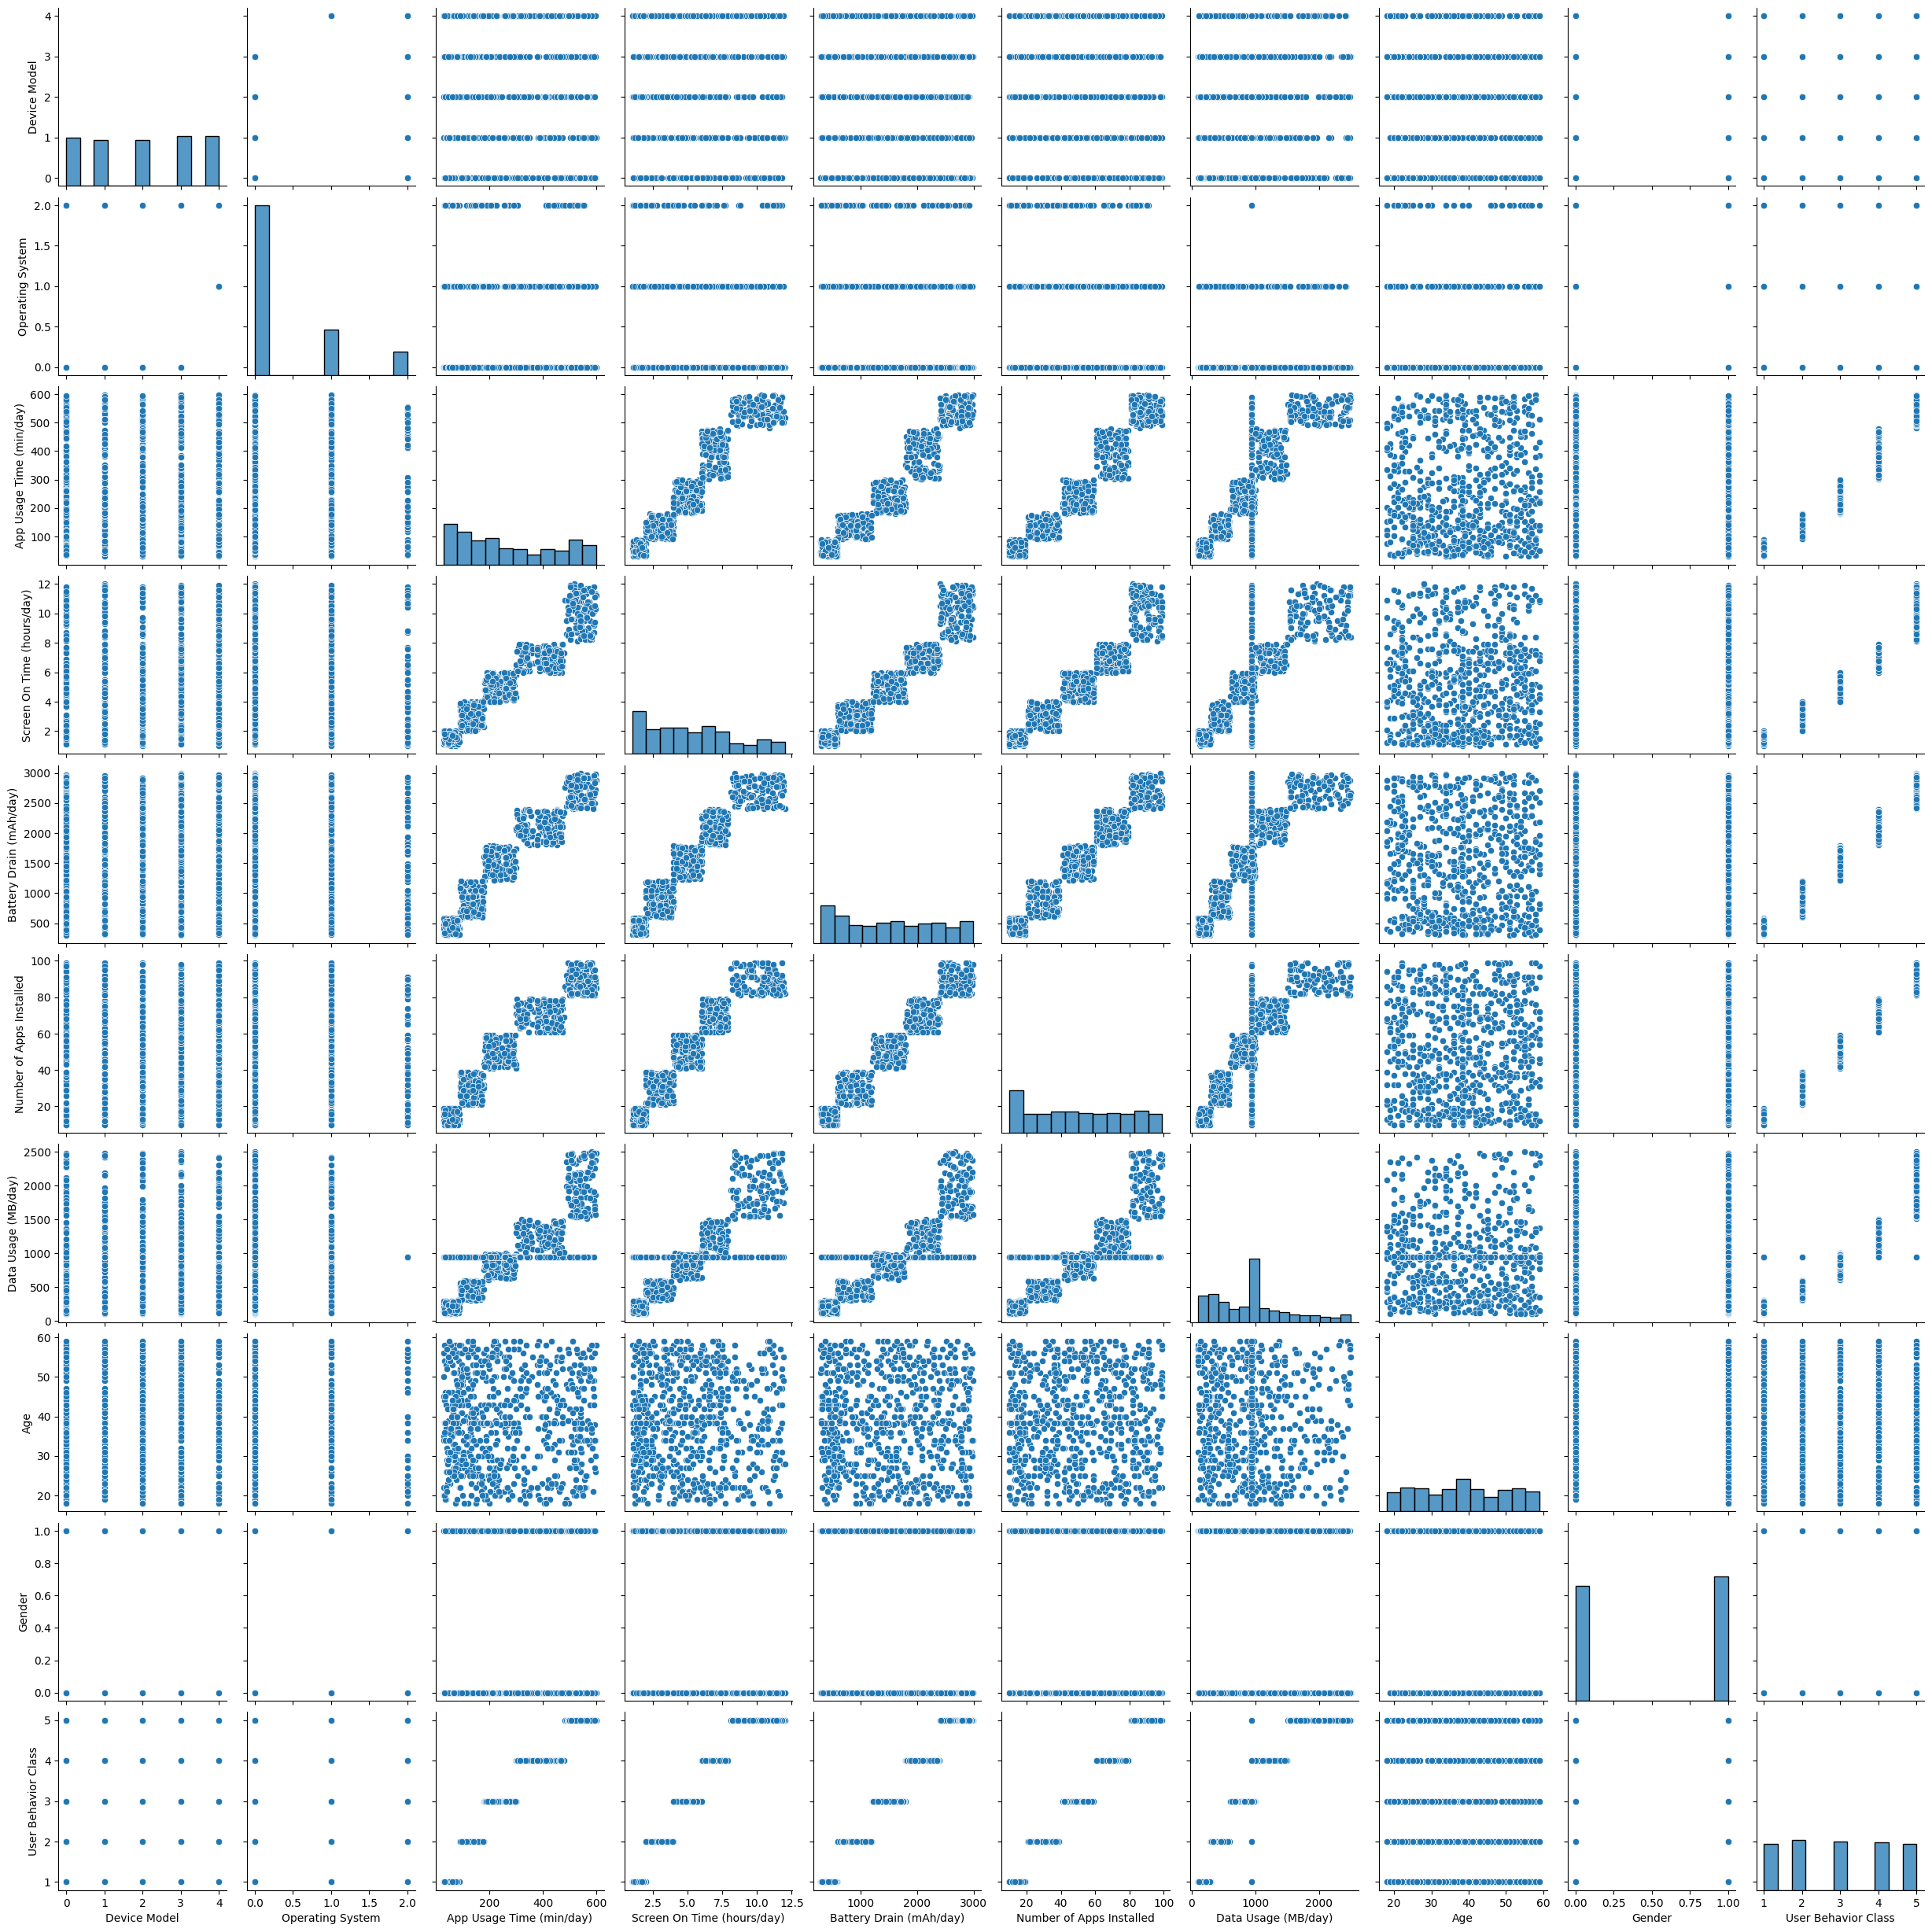

In [91]:
import seaborn as sns

sns.pairplot(copy_df)